### Oneeba Ahsan
### Task # 2
### Prediction using UnSupervised ML 
### Level - Beginner

# Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [11]:
data = pd.read_csv("./Iris.csv")
data.drop('Species',axis=1,inplace=True)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


# Using Kmeans to predict the data

In [13]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data)  #fitting the data into model
kmeans.inertia_   

70616.29893333331

Text(0, 0.5, 'Inertia')

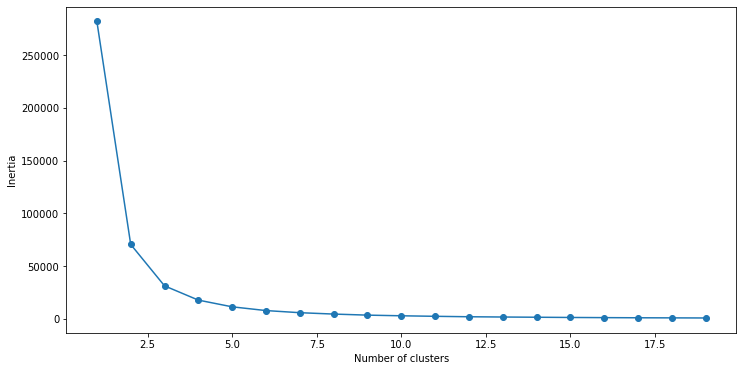

In [16]:
SSE = []
for cluster in range(1,20):    #loop till 20 to find the best kmeans value
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data)     
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})      
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')   # x axis
plt.ylabel('Inertia')              # y axis

In [22]:
kmeans = KMeans(n_clusters = 3, init='k-means++')   #from the previous cell, the best kmeans value is 3 and hence we used it
pred = kmeans.fit_predict(data)                     #fit the data into the model
pred                                                #print the predicted values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

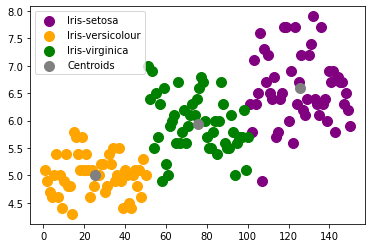

In [27]:
x = data.iloc[:,:].values

plt.scatter(x[pred == 0, 0], x[pred == 0, 1],s = 100, c = 'purple', label = 'Iris-setosa')      #plot iris-setosa
plt.scatter(x[pred == 1, 0], x[pred == 1, 1],s = 100, c = 'orange', label = 'Iris-versicolour') #plot iris-versicolor
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')    #plor iris-virginica

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'grey', label = 'Centroids')  

plt.legend()